In [1]:
from ultralytics import YOLO
import cv2
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
model = YOLO("../runs/detect/tattoo/run1/weights/best.pt")

In [4]:
metrics = model.val(
    data="tattoo_dataset/data.yaml",
    split="test",
    imgsz=512,
    conf=0.5, # confidence score
    iou=0.6, # intersection over union (iou) score
    device=0
)

Ultralytics 8.4.14  Python-3.10.11 torch-2.10.0+cu130 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Model summary (fused): 73 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.20.1 ms, read: 9.07.3 MB/s, size: 77.8 KB)
val: Scanning C:\Users\Aaghaaz Khan\Personal\NoteActive\AI_Training\Day_3\tattoo_dataset\labels\test.cache... 6 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 6/6  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.2s/it 2.2s
                   all          6          6          1          1      0.995      0.897
Speed: 1.4ms preprocess, 27.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to C:\Users\Aaghaaz Khan\Personal\NoteActive\AI_Training\runs\detect\val9


In [5]:
metrics.results_dict

{'metrics/precision(B)': 1.0,
 'metrics/recall(B)': 1.0,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.8971500000000001,
 'fitness': 0.8971500000000001}

In [6]:
image_path = "tattoo_inf_img.webp"  # change this
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
result = model.predict(
    source=image_path,
    conf=0.6,
    iou=0.5,
    save=False
)


image 1/1 c:\Users\Aaghaaz Khan\Personal\NoteActive\AI_Training\Day_3\tattoo_inf_img.webp: 512x512 1 tattoo, 21.4ms
Speed: 2.6ms preprocess, 21.4ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


In [8]:
annotated_img = result[0].plot()

In [9]:
cv2.imwrite("result.jpg", annotated_img)

True

Result

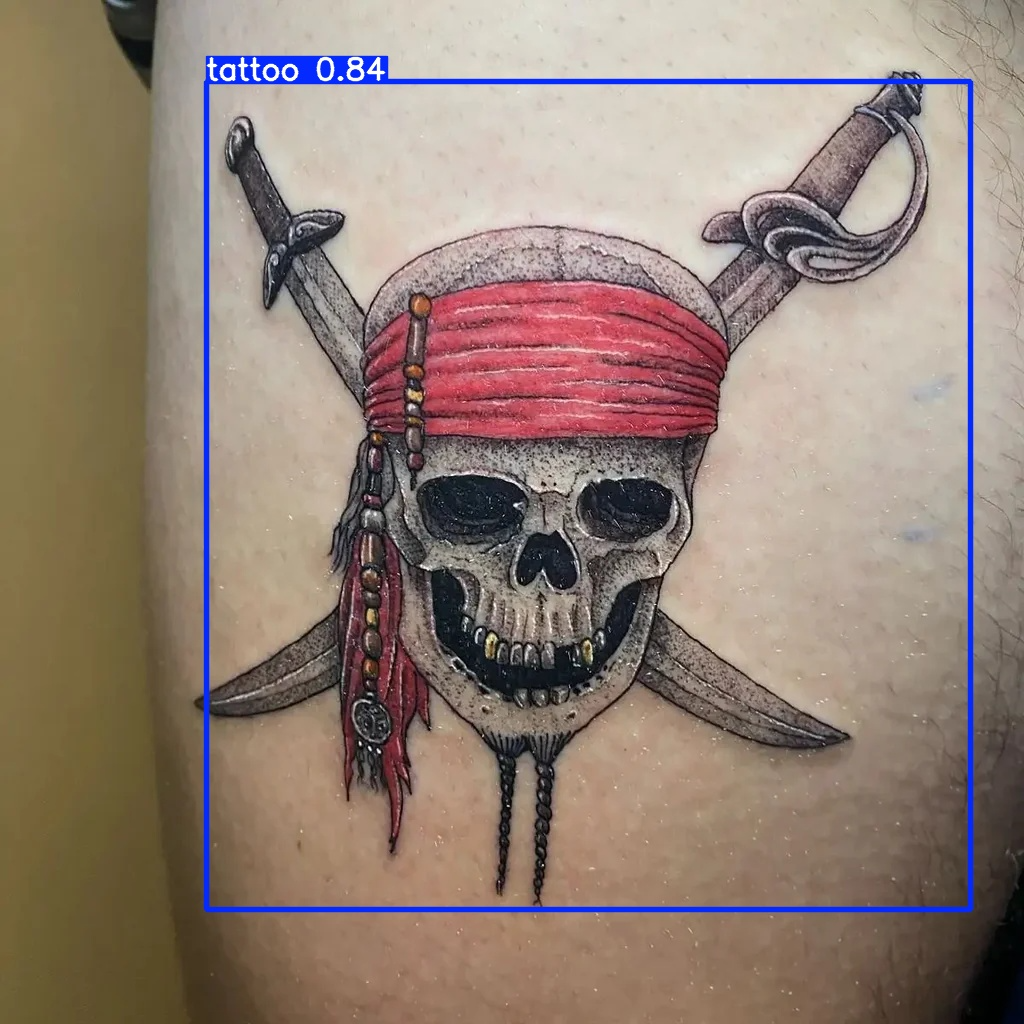